In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('./dataframes/alarm_data.xlsx')

In [3]:
df_bck = df.copy()

# Alarm explotation

## Data Features

In [4]:
df.head()

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,DateTime,Ms,State,dt,Plant,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week
0,2022-01-01 01:50:00,3,2022-01-01,4,35001,2022-01-01 01:59:04,883,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
1,2022-01-01 01:50:00,3,2022-01-01,4,35001,2022-01-01 01:59:26,905,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
2,2022-01-01 01:50:00,3,2022-01-01,4,35001,2022-01-01 01:59:45,733,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52
3,2022-01-01 02:00:00,1,2022-01-01,4,35001,2022-01-01 02:00:22,876,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,NaN,2021-01,2021-52
4,2022-01-01 02:40:00,5,2022-01-01,4,35001,2022-01-01 02:48:24,563,1,0,KÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã...,...,5,25,0,good_day,valid,is_weekend,NaN,Unacknowledged or Fleeting,2021-01,2021-52


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541619 entries, 0 to 541618
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   rounding              541619 non-null  datetime64[ns]
 1   Nr per 10             541619 non-null  int64         
 2   date                  541619 non-null  datetime64[ns]
 3   unique_alarms_date    541619 non-null  int64         
 4   MsgNr                 541619 non-null  int64         
 5   DateTime              541619 non-null  datetime64[ns]
 6   Ms                    541619 non-null  int64         
 7   State                 541619 non-null  int64         
 8   dt                    541619 non-null  int64         
 9   Plant                 541619 non-null  object        
 10  Component             375183 non-null  object        
 11  Text                  541568 non-null  object        
 12  Type                  541619 non-null  object        
 13 

## Alarm time distribution

In [6]:
#creating dataframe which distributes the number of alarms activated per month
events = pd.DataFrame(df.groupby(df['date'].dt.strftime('%Y-%m'))['date'].count()).rename(columns={'date': 'times'})
events

,times
date,
2022-01,31106
2022-02,32267
2022-03,51353
2022-04,35567
2022-05,39081
2022-06,36618
2022-07,44464
2022-08,82174
2022-09,64075


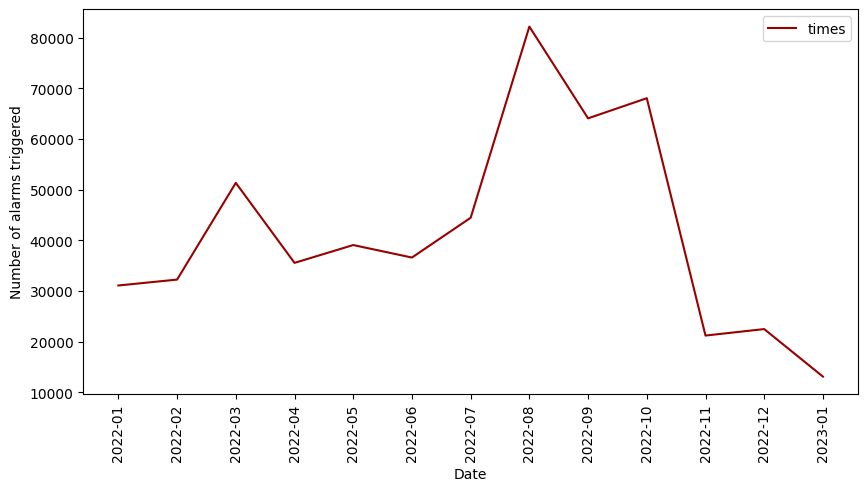

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(data=events, palette=['#990000'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of alarms triggered')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [7]:
# Creating a new dataframe that counts how many times each unique alarm ID has been triggered
alarms = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'}).sort_values(by = ['occurrences'], ascending = False)
alarms.head()

,occurrences
MsgNr,
6279,49531
6280,42735
11231,34212
11232,27315
11225,21615


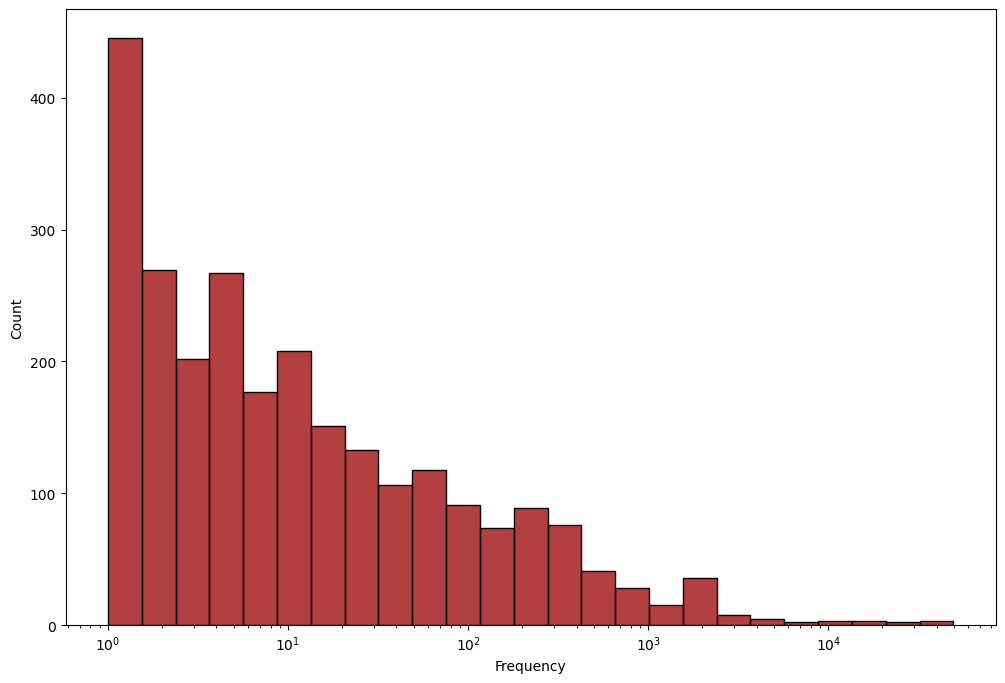

In [8]:
# Histogram on the frequncy of number of activation per alarms
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=alarms.reset_index(), x='occurrences', ax=ax, color='#990000', log_scale=True)
ax.set_xlabel('Frequency')
ax.set_ylabel('Count')
plt.show()

In [9]:
print(f'There are {alarms.shape[0]} unique alarms, that have been triggered {alarms.occurrences.sum()} times ')

There are 2552 unique alarms, that have been triggered 541619 times 


## Alarm reduction of occurences

In [10]:
#Calculating the mean value and standard deviation of how many times one alarm is activated
mean = np.mean(alarms)
std_dev = np.std(alarms)
print('The mean value is: ', mean.occurrences, ' and the st deviation: ', std_dev.occurrences)

The mean value is:  212.23315047021944  and the st deviation:  1807.218147949279


c:\Users\manda\OneDrive - ROCKWOOL Group\Documents\Mthesis\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [11]:
#Creating three threshold values, which are X times the standard deviation
list = [1, 2, 3]
threshold = [(mean.occurrences + i*std_dev.occurrences) for i in list]

In [12]:
#Creating the mask which says if the añlarm is above the threeshold or not
mask = [(alarms >= x) for x in threshold]

In [13]:
# Counting for the three thresohlds how many alarms are True and False 
del list
data_inverse = [alarms[~item].occurrences.sum() for item in mask]
df = [alarms[item].occurrences.sum() for item in mask]
pairs = list(zip(data_inverse, df))
pairs
    

[(194125.0, 347494.0), (246733.0, 294886.0), (265099.0, 276520.0)]

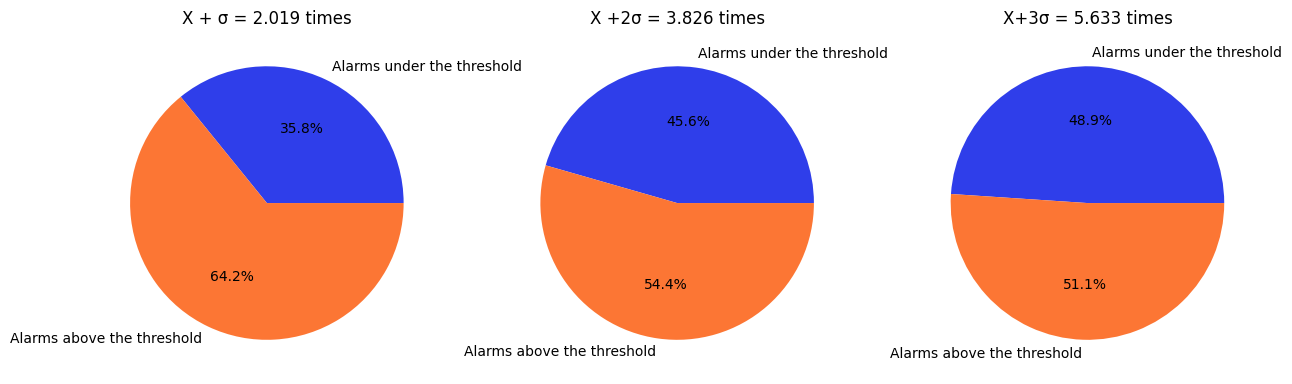

In [14]:
#Plotting alarms withing and outside the threshold values
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
labels = ['Alarms under the threshold', 'Alarms above the threshold']
colors = ['#2F3EEA', '#FC7634']

ax1.pie(pairs[0], labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title("X + σ = 2.019 times")

ax2.pie(pairs[1], labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title("X +2σ = 3.826 times")

ax3.pie(pairs[2], labels=labels, colors=colors, autopct='%1.1f%%')
ax3.set_title("X+3σ = 5.633 times")

plt.show()

In [15]:
mask[0]

,occurrences
MsgNr,
6279,True
6280,True
11231,True
11232,True
11225,True
...,...
26032,False
6300,False
6412,False


In [65]:
# Now it is selected the first option taking into consideration the 64.2% of alarms
df = pd.DataFrame(alarms[mask[0]].occurrences.dropna())

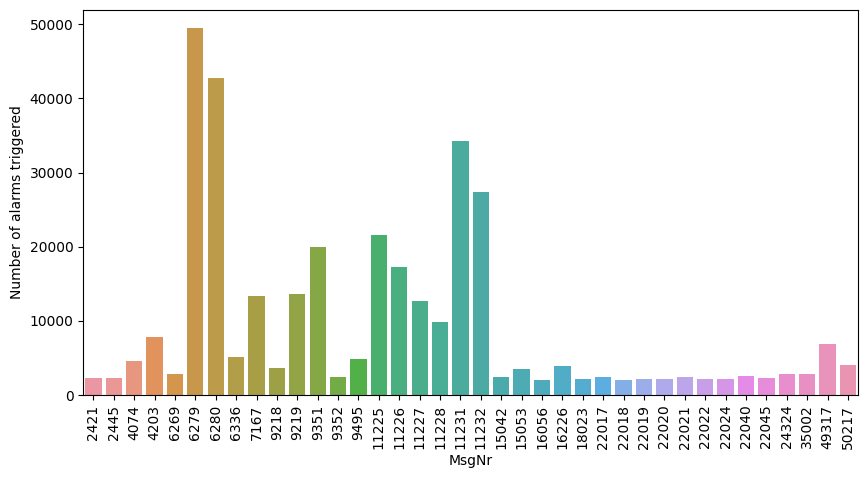

In [17]:
# Plot of the most triggered alarms
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=df, x=df.index, y="occurrences")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Number of alarms triggered')
plt.show()

In [18]:
relevant_alarms = df.index.tolist()
print(f'there are {len(relevant_alarms)} alarms which represents the majority part of the events')

there are 38 alarms which represents the majority part of the events


In [68]:
#selecting from the original dataset just the selected alarms
df = df_bck[df_bck['MsgNr'].isin(relevant_alarms)]

## Components

In [69]:
#Gourping by component (winCC) and plant
grouped = df.groupby(['Component', 'Plant']).size().reset_index().rename(columns={0:'times'})
grouped

,Component,Plant,times
0,.10-61.1U3,CO_Curingoven,38886
1,.10-61.1U6,CO_Curingoven,22464
2,.10-62.2U3,CO_Curingoven,61527
3,.10-63.21U8,Sammelkam.,2844
4,.10-63.26A3,Abfallbeh. UV42,2763
5,.10-65.22U4/8,Sammelkam.,92266
6,.2-3.15M2,Sammelkam.,5035
7,2-2.1F8,Schw.SpaltsÃ¤g,1908
8,2-2.1F8,Schw.SpaltsÃƒÂ¤g,489
9,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚Â¤g,136


In [21]:
# The biggest part of alarms are caused by the curing oven
sum_scores = grouped.loc[grouped['Plant'] == 'CO_Curingoven', 'times'].sum()
sum_scores

122877

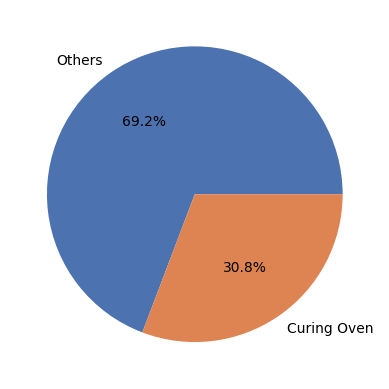

In [22]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5)
df2 = [grouped.times.sum(), grouped.loc[grouped['Plant'] == 'CO_Curingoven', 'times'].sum()]
colors = sns.color_palette('deep')[0:5]
plt.pie(df2, colors=colors, labels=['Others', 'Curing Oven'], autopct='%1.1f%%')

plt.show()

In [23]:
#Creating a dataset with the components and which alarms refers to
grouped = df.groupby(['Component', 'MsgNr'])['Component'].count()
grouped = grouped.to_frame().rename(columns={'Component': 'times'}).reset_index()
grouped

,Component,MsgNr,times
0,.10-61.1U3,11225,21615
1,.10-61.1U3,11226,17271
2,.10-61.1U6,11227,12617
3,.10-61.1U6,11228,9847
4,.10-62.2U3,11231,34212
5,.10-62.2U3,11232,27315
6,.10-63.21U8,6269,2844
7,.10-63.26A3,24324,2763
8,.10-65.22U4/8,6279,49531
9,.10-65.22U4/8,6280,42735


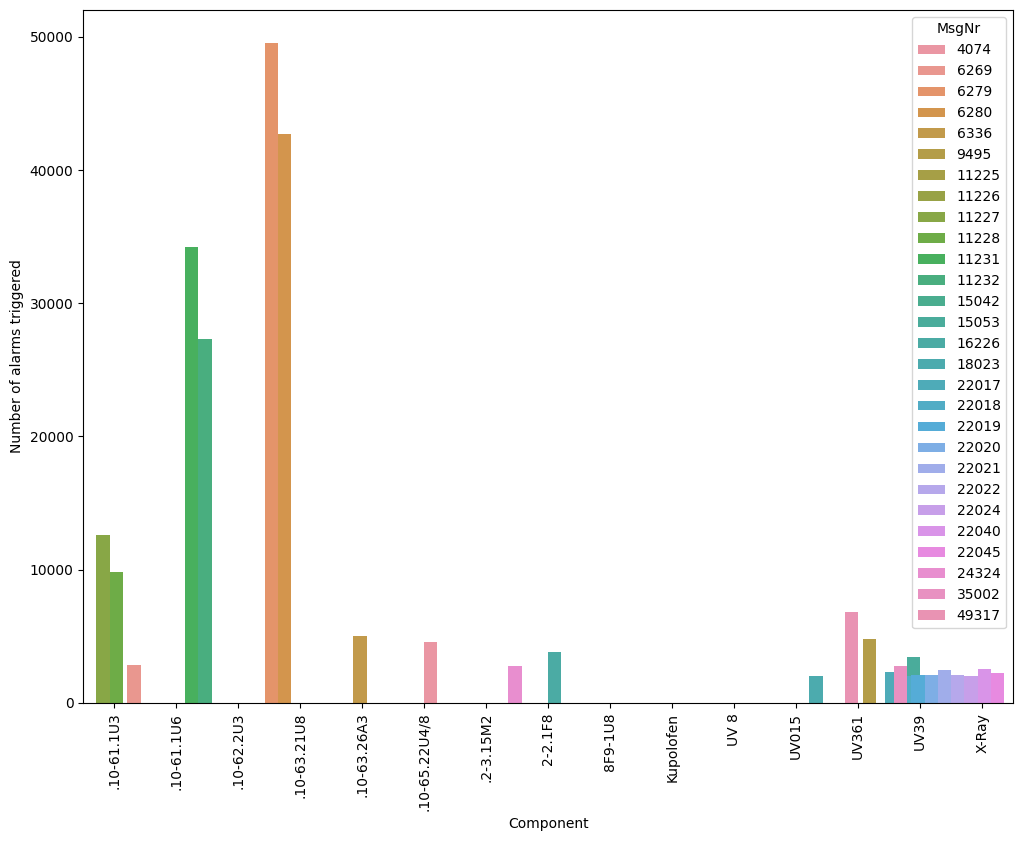

In [24]:
fig, ax = plt.subplots(figsize = (12,9))
s = sns.barplot(data=grouped, x='Component', y='times', hue='MsgNr', dodge='False', width=6)
s.tick_params(axis='x', labelrotation=90)
s.set_ylabel('Number of alarms triggered')
plt.show()

## Sets of alarms

In [25]:
#make the dataset datetime-index based
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace = True)
df

C:\Users\manda\AppData\Local\Temp\ipykernel_17580\2302389404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df['DateTime'])


,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,Component,...,weekday,Total_alarms_of_date,alarms_by_date_bins,good_bad_outlier,is_valid,is_weekend,Area,Response,Year-Month,Year-Week
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,NaN,...,0,430,0,good_day,valid,is_weekday,Packing,Acknowledged,2022-01,2022-01
2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,UV39,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01
2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,8F9-1U8,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01
2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,UV39,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01
2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,UV39,...,0,430,0,good_day,valid,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:59:13,2023-01-31 23:50:00,51,2023-01-31,167,22021,613,1,0,Wickler,UV361,...,1,765,0,good_day,valid,is_weekday,Packing,Unacknowledged or Fleeting,2023-01,2023-05
2023-01-31 23:59:13,2023-01-31 23:50:00,51,2023-01-31,167,22022,613,1,0,Wickler,UV361,...,1,765,0,good_day,valid,is_weekday,Packing,Unacknowledged or Fleeting,2023-01,2023-05
2023-01-31 23:59:14,2023-01-31 23:50:00,51,2023-01-31,167,22040,478,1,0,Wickler,UV361,...,1,765,0,good_day,valid,is_weekday,Packing,Unacknowledged or Fleeting,2023-01,2023-05


In [26]:
#calculate the difference in seconds between events and agrgegate them into groups
df = df.copy()
df['seconds_diff'] = df.index.to_series().diff().dt.total_seconds()
df['dependence_bigger10min'] = df['seconds_diff'].apply(lambda s: 0 if s<=600 else 1)
df['dependence_5-10min'] = df['seconds_diff'].apply(lambda s: 1 if s<600 and s>=300 else 0)
df['dependence_1-5min'] = df['seconds_diff'].apply(lambda s: 1 if s<300 and s>60 else 0)
df['dependence_1min'] = df['seconds_diff'].apply(lambda s: 0 if s<=60 else 1)
df.head()

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,Component,...,is_weekend,Area,Response,Year-Month,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,NaN,...,is_weekday,Packing,Acknowledged,2022-01,2022-01,NaN,1,0,0,1
2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,UV39,...,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01,10316.0,1,0,0,1
2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,8F9-1U8,...,is_weekday,Melting and Spinning,Acknowledged,2022-01,2022-01,157.0,0,0,1,1
2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,UV39,...,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01,138.0,0,0,1,1
2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,UV39,...,is_weekday,Melting and Spinning,Unacknowledged or Fleeting,2022-01,2022-01,1231.0,1,0,0,1


In [27]:
# Count number of occurences per condition
df[['dependence_bigger10min','dependence_5-10min','dependence_1-5min','dependence_1min']].sum()

dependence_bigger10min     8994
dependence_5-10min        10336
dependence_1-5min         62030
dependence_1min           81374
dtype: int64

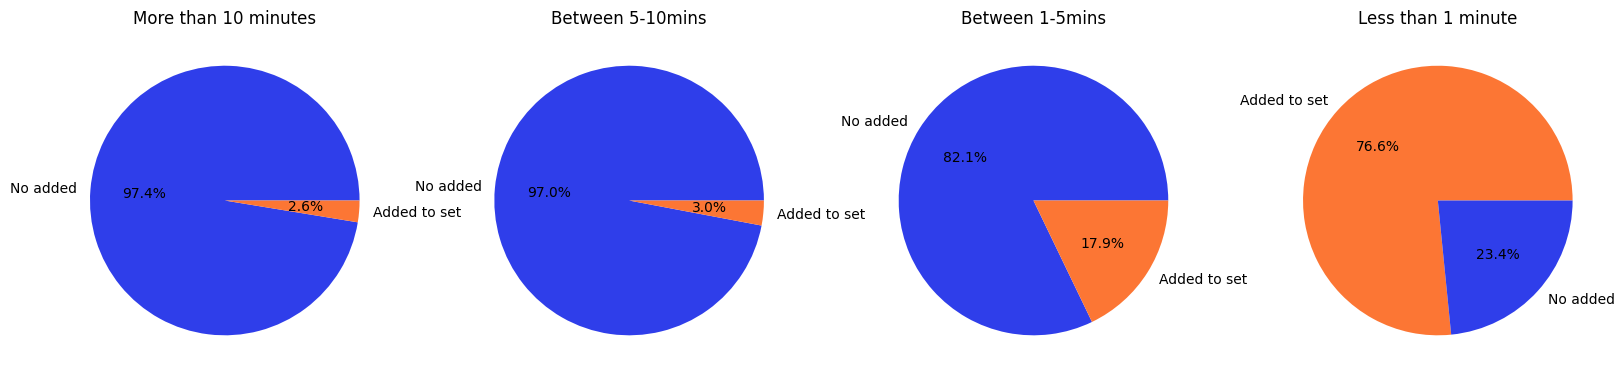

In [28]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
colors = ['#2F3EEA', '#FC7634']
new_colors = colors[::-1]

ax1.pie(df['dependence_bigger10min'].value_counts(), colors=colors, labels=['No added', 'Added to set'], autopct='%1.1f%%')
ax1.set_title('More than 10 minutes')

ax2.pie(df['dependence_5-10min'].value_counts(), colors=colors, labels=['No added', 'Added to set'], autopct='%1.1f%%')
ax2.set_title('Between 5-10mins')

ax3.pie(df['dependence_1-5min'].value_counts(), colors=colors, labels=['No added', 'Added to set'], autopct='%1.1f%%')
ax3.set_title('Between 1-5mins')

colors = [colors[1], colors[0]]
ax4.pie(df['dependence_1min'].value_counts(), colors=colors, labels=['Added to set', 'No added'], autopct='%1.1f%%')
ax4.set_title('Less than 1 minute')

plt.show()


In [29]:
# Creating a column which ennumerates and increases the number of sets
df['inverted'] = df.dependence_1min.shift()
df['output'] = 0
df.loc[df.dependence_1min==0, 'output'] = df[df.dependence_1min==0].inverted.cumsum()
df.head()

,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,Component,...,Response,Year-Month,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,NaN,...,Acknowledged,2022-01,2022-01,NaN,1,0,0,1,NaN,0
2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,UV39,...,Acknowledged,2022-01,2022-01,10316.0,1,0,0,1,1.0,0
2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,8F9-1U8,...,Acknowledged,2022-01,2022-01,157.0,0,0,1,1,1.0,0
2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,UV39,...,Unacknowledged or Fleeting,2022-01,2022-01,138.0,0,0,1,1,1.0,0
2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,UV39,...,Unacknowledged or Fleeting,2022-01,2022-01,1231.0,1,0,0,1,1.0,0


In [30]:
df.reset_index(inplace=True)  # Reset the index
df['new_output'] = df['output'].shift(-1)
df['sequences'] = df['output']
df.loc[df['new_output'] >= df['output'], 'sequences'] = df['new_output']
df[:5]

,DateTime,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,L-Ende UV136,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,Emissionsmessung,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2,2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,Rekuperator,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
3,2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,Emissionsmessung,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
4,2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,Emissionsmessung,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0


In [31]:
print(f'number of sets of alarms identified {int(df.output.max())}')

number of sets of alarms identified 47597


In [32]:
# How many occurences there are per block of alarms
grouped = df.groupby(['output'])['output'].count()
grouped = grouped.to_frame().drop(0).rename(columns={'output': 'occurrences'}).sort_values(by=['occurrences'])
grouped

,occurrences
output,
20268,1
13880,1
13879,1
42842,1
13877,1
...,...
47325,615
44045,701
42707,726


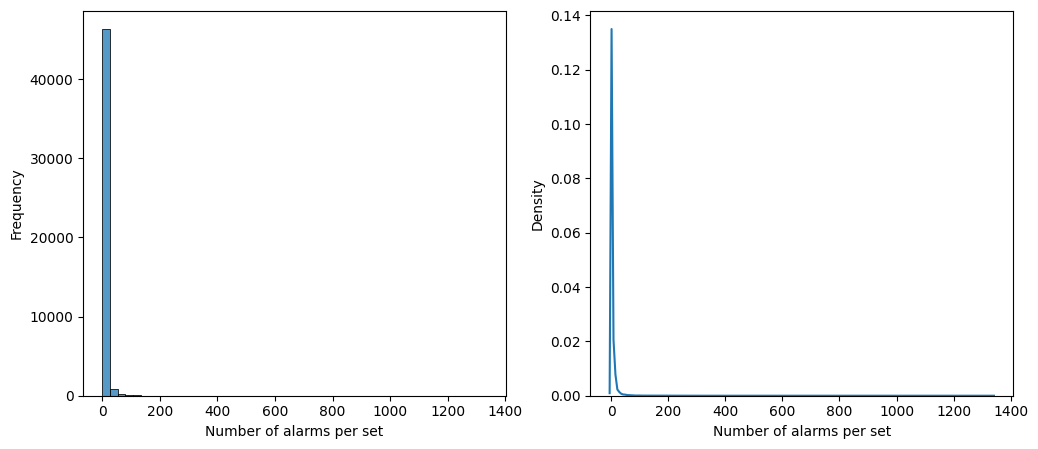

In [33]:
#Sets of alarms distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(grouped['occurrences'], bins=50, ax=ax1)
ax1.set_xlabel('Number of alarms per set')
ax1.set_ylabel('Frequency')

sns.kdeplot(grouped['occurrences'], ax=ax2)
ax2.set_xlabel('Number of alarms per set')

plt.show()


In [34]:
# Taking quantile 95 data
grouped = grouped[grouped.occurrences< grouped.quantile(q=0.95).occurrences]
grouped.shape


(45161, 1)

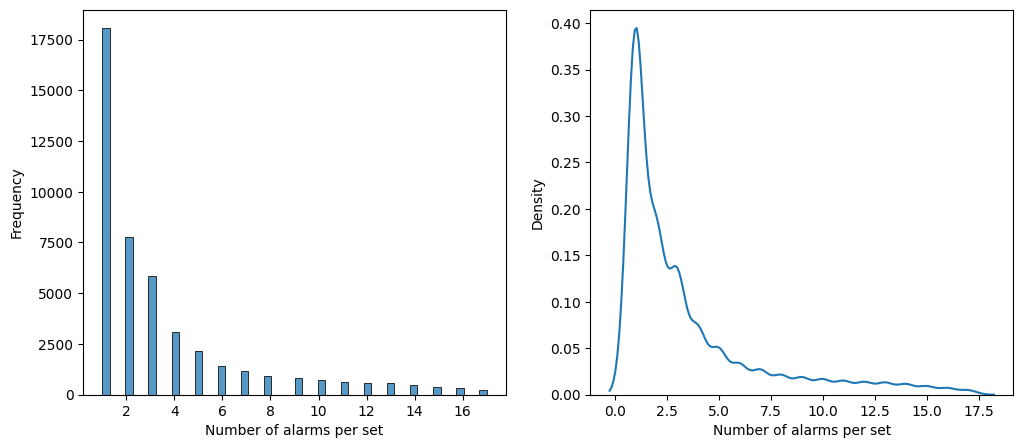

In [35]:
# Plot quantile 95 data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(grouped['occurrences'], bins=50, ax=ax1)
ax1.set_xlabel('Number of alarms per set')
ax1.set_ylabel('Frequency')

sns.kdeplot(grouped['occurrences'], ax=ax2)
ax2.set_xlabel('Number of alarms per set')

plt.show()

In [36]:
[11226, 11226, 11225, 11226, 11225, 11226, 11226, 11226, 11225, 11226, 11226]

[11226, 11226, 11225, 11226, 11225, 11226, 11226, 11226, 11225, 11226, 11226]

In [37]:
df_bck = df.copy()

## Alarms and warnings and messages classification


In [74]:
import pandas as pd
df = pd.read_csv('./dataframes/clean_data.csv')


In [75]:
#current number of alarms
df.shape

(347494, 44)

In [76]:
#Two alarms within the same component are selected
grouped = df[['Text',"MsgNr","Type"]].loc[df['MsgNr'].isin([11225, 11226])]
# grouped = df[['Text',"MsgNr","Type", "Component", "Plant"]].loc[df['MsgNr'].isin([4203])]
grouped

,Text,MsgNr,Type
2901,Druck oberband eintritt hoch,11225,Alarm
6732,Druck oberband eintritt zu hoch,11226,Alarm
6733,Druck oberband eintritt hoch,11225,Alarm
6746,Druck oberband eintritt hoch,11225,Alarm
6747,Druck oberband eintritt zu hoch,11226,Alarm
...,...,...,...
345855,Druck oberband eintritt zu hoch,11226,Alarm
345859,Druck oberband eintritt hoch,11225,Warning
345860,Druck oberband eintritt zu hoch,11226,Alarm
346874,Druck oberband eintritt hoch,11225,Warning


In [77]:
grouped.shape

(38886, 3)

In [78]:
grouped = grouped.groupby(['MsgNr', 'Type'])['MsgNr'].count()
grouped_filtered_df = pd.DataFrame(grouped).rename(columns={'MsgNr':'Number of events triggered'}).reset_index()
grouped_filtered_df


,MsgNr,Type,Number of events triggered
0,11225,Alarm,3340
1,11225,Warning,18275
2,11226,Alarm,17271


In [80]:
# Grouping on how many alarms belong to the different types
grouped_filtered = grouped[grouped.index.get_level_values('MsgNr').isin([11225, 11226])]
grouped_filtered_df = pd.DataFrame(grouped_filtered).rename(columns={'MsgNr':'Number of events triggered'}).reset_index()
grouped_filtered_df

,MsgNr,Type,Number of events triggered
0,11225,Alarm,3340
1,11225,Warning,18275
2,11226,Alarm,17271


<Axes: xlabel='MsgNr', ylabel='Number of events triggered'>

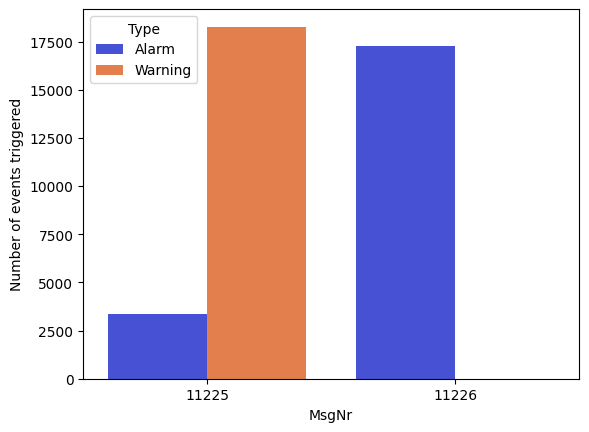

In [81]:
sns.barplot(data=grouped_filtered_df, x='MsgNr', y='Number of events triggered', hue='Type', palette = ['#2F3EEA', '#FC7634'])

In [82]:
#checking how many observatipons are there per type
df_type = df.groupby(['Type'])['Type'].count()
df_type = pd.DataFrame(df_type)
df_type.head()

,Type
Type,
Alarm,224570
Message,71782
Warning,51142


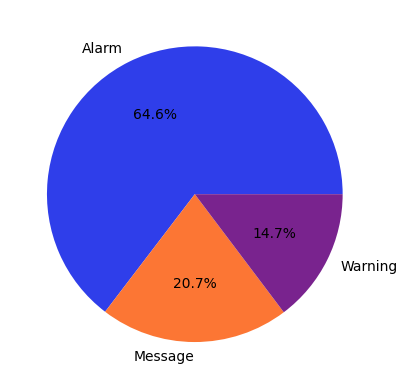

In [83]:
colors = sns.color_palette('deep')[0:5]
plt.pie(df_type['Type'], colors=['#2F3EEA', '#FC7634', '#79238E'], labels=['Alarm', 'Message','Warning'], autopct='%1.1f%%')
plt.show()

In [84]:
df_bck = df.copy()

In [85]:
df_bck

,Unnamed: 0,level_0,DateTime,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,0,0,2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,1,1,2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2,2,2,2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
3,3,3,2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
4,4,4,2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347489,347489,347489,2023-01-31 23:59:13,2023-01-31 23:50:00,51,2023-01-31,167,22021,613,1,...,2023-05,0.0,0,0,0,0,0.0,47597,47597.0,47597
347490,347490,347490,2023-01-31 23:59:13,2023-01-31 23:50:00,51,2023-01-31,167,22022,613,1,...,2023-05,0.0,0,0,0,0,0.0,47597,47597.0,47597
347491,347491,347491,2023-01-31 23:59:14,2023-01-31 23:50:00,51,2023-01-31,167,22040,478,1,...,2023-05,1.0,0,0,0,0,0.0,47597,47597.0,47597
347492,347492,347492,2023-01-31 23:59:15,2023-01-31 23:50:00,51,2023-01-31,167,22018,480,1,...,2023-05,1.0,0,0,0,0,0.0,47597,47597.0,47597


In [86]:
#all unique alarms an occurences, taking into account alarms, warnings and messages
df_complete = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

In [87]:
df = df[df['Type']== 'Alarm']

In [88]:
df.shape

(224570, 44)

In [89]:
#all unique alarms an occurences, taking into account just alarms
df_alarms = pd.DataFrame(df.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

## Chattering alarms

In [90]:
data = df[['DateTime', 'MsgNr', 'Component', 'Plant', 'Text']]
data.head()

,DateTime,MsgNr,Component,Plant,Text
7,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked
8,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...
9,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...


In [91]:
#Aggregating time difference between the SAME alarm event
data = data.copy()
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['time_diff'] = data.groupby('MsgNr')['DateTime'].diff()
data[:10]

,DateTime,MsgNr,Component,Plant,Text,time_diff
7,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,NaT
8,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,NaT
9,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,NaT
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,0 days 00:02:05
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:11:15
12,2022-01-03 09:53:36,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:14:18
13,2022-01-03 10:00:21,18023,UV015,LiniensÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â...,Bandsaege 2 Laufstoerung,NaT
14,2022-01-03 10:03:25,24324,.10-63.26A3,Abfallbeh. UV42,Schalter FÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒ...,NaT
16,2022-01-03 10:10:01,9218,NaN,ACON/E-Welle,Danee links laser blocked,NaT
17,2022-01-03 10:10:22,9218,NaN,ACON/E-Welle,Danee links laser blocked,0 days 00:00:21


In [92]:
data_bck = data.copy()

In [93]:
# If one alarm is repeated within the same minute, just take 1 value
data = data[pd.isna(data['time_diff']) | (data['time_diff'] > pd.Timedelta(minutes=1))]
data

,DateTime,MsgNr,Component,Plant,Text,time_diff
7,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,NaT
8,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,NaT
9,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,NaT
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,0 days 00:02:05
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:11:15
...,...,...,...,...,...,...
347483,2023-01-31 23:58:43,22017,UV361,Wickler,Komponente Linearantrieb W1 Alarm,0 days 00:01:35
347485,2023-01-31 23:59:13,22024,UV361,Wickler,Komponente Folienrolle W1 Alarm,0 days 00:02:05
347487,2023-01-31 23:59:13,22019,UV361,Wickler,Komponente unteres Kompressionsband W1 Alarm,0 days 00:02:05
347488,2023-01-31 23:59:13,22020,UV361,Wickler,Komponente oberes Kompressionsband W1 Alarm,0 days 00:02:05


In [94]:
df_chattering = pd.DataFrame(data.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

In [95]:
data['time_diff_plant'] = data.groupby('Plant')['DateTime'].diff()
data[:10]

,DateTime,MsgNr,Component,Plant,Text,time_diff,time_diff_plant
7,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,NaT,NaT
8,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,NaT,NaT
9,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,NaT,NaT
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,0 days 00:02:05,0 days 00:02:05
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:11:15,0 days 00:11:15
12,2022-01-03 09:53:36,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:14:18,0 days 00:14:18
13,2022-01-03 10:00:21,18023,UV015,LiniensÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â...,Bandsaege 2 Laufstoerung,NaT,NaT
14,2022-01-03 10:03:25,24324,.10-63.26A3,Abfallbeh. UV42,Schalter FÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒ...,NaT,NaT
16,2022-01-03 10:10:01,9218,NaN,ACON/E-Welle,Danee links laser blocked,NaT,0 days 00:52:13
18,2022-01-03 10:11:28,9218,NaN,ACON/E-Welle,Danee links laser blocked,0 days 00:01:06,0 days 00:01:27


In [96]:
data = data[pd.isna(data['time_diff']) | (data['time_diff_plant'] > pd.Timedelta(minutes=1))]
data

,DateTime,MsgNr,Component,Plant,Text,time_diff,time_diff_plant
7,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,NaT,NaT
8,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,NaT,NaT
9,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,NaT,NaT
10,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,0 days 00:02:05,0 days 00:02:05
11,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:11:15,0 days 00:11:15
...,...,...,...,...,...,...,...
347460,2023-01-31 23:53:15,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,0 days 00:02:33,0 days 00:02:33
347462,2023-01-31 23:55:07,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,0 days 00:01:05,0 days 00:01:52
347465,2023-01-31 23:56:33,22021,UV361,Wickler,Komponente oberes Schwinge W1 Alarm,0 days 16:48:07,0 days 16:47:54
347478,2023-01-31 23:58:37,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,0 days 00:01:55,0 days 00:03:30


In [97]:
data_filtered = pd.DataFrame(data.groupby(['MsgNr'])['MsgNr'].count()).rename(columns={'MsgNr': 'occurrences'})

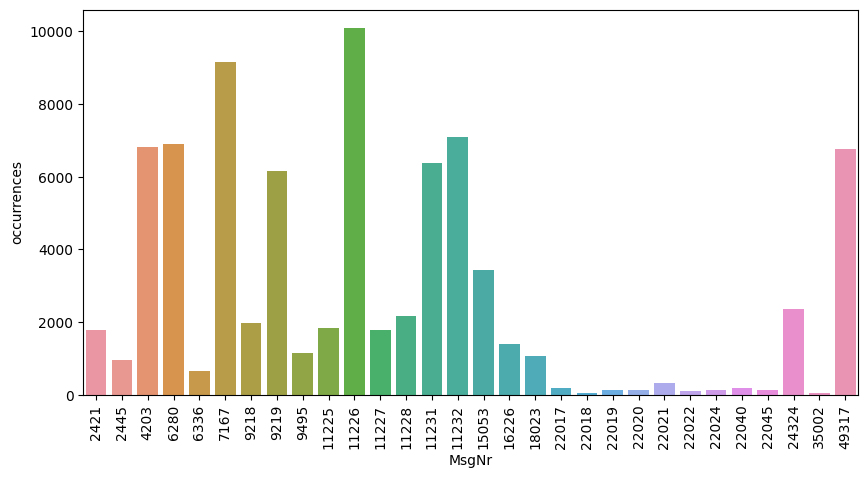

In [98]:
plt.figure(figsize = (10,5))
sns.barplot(data=data_filtered, x=data_filtered.index, y='occurrences')
plt.tick_params(axis='x', labelrotation=90)
# plt.set_title("")
plt.show()

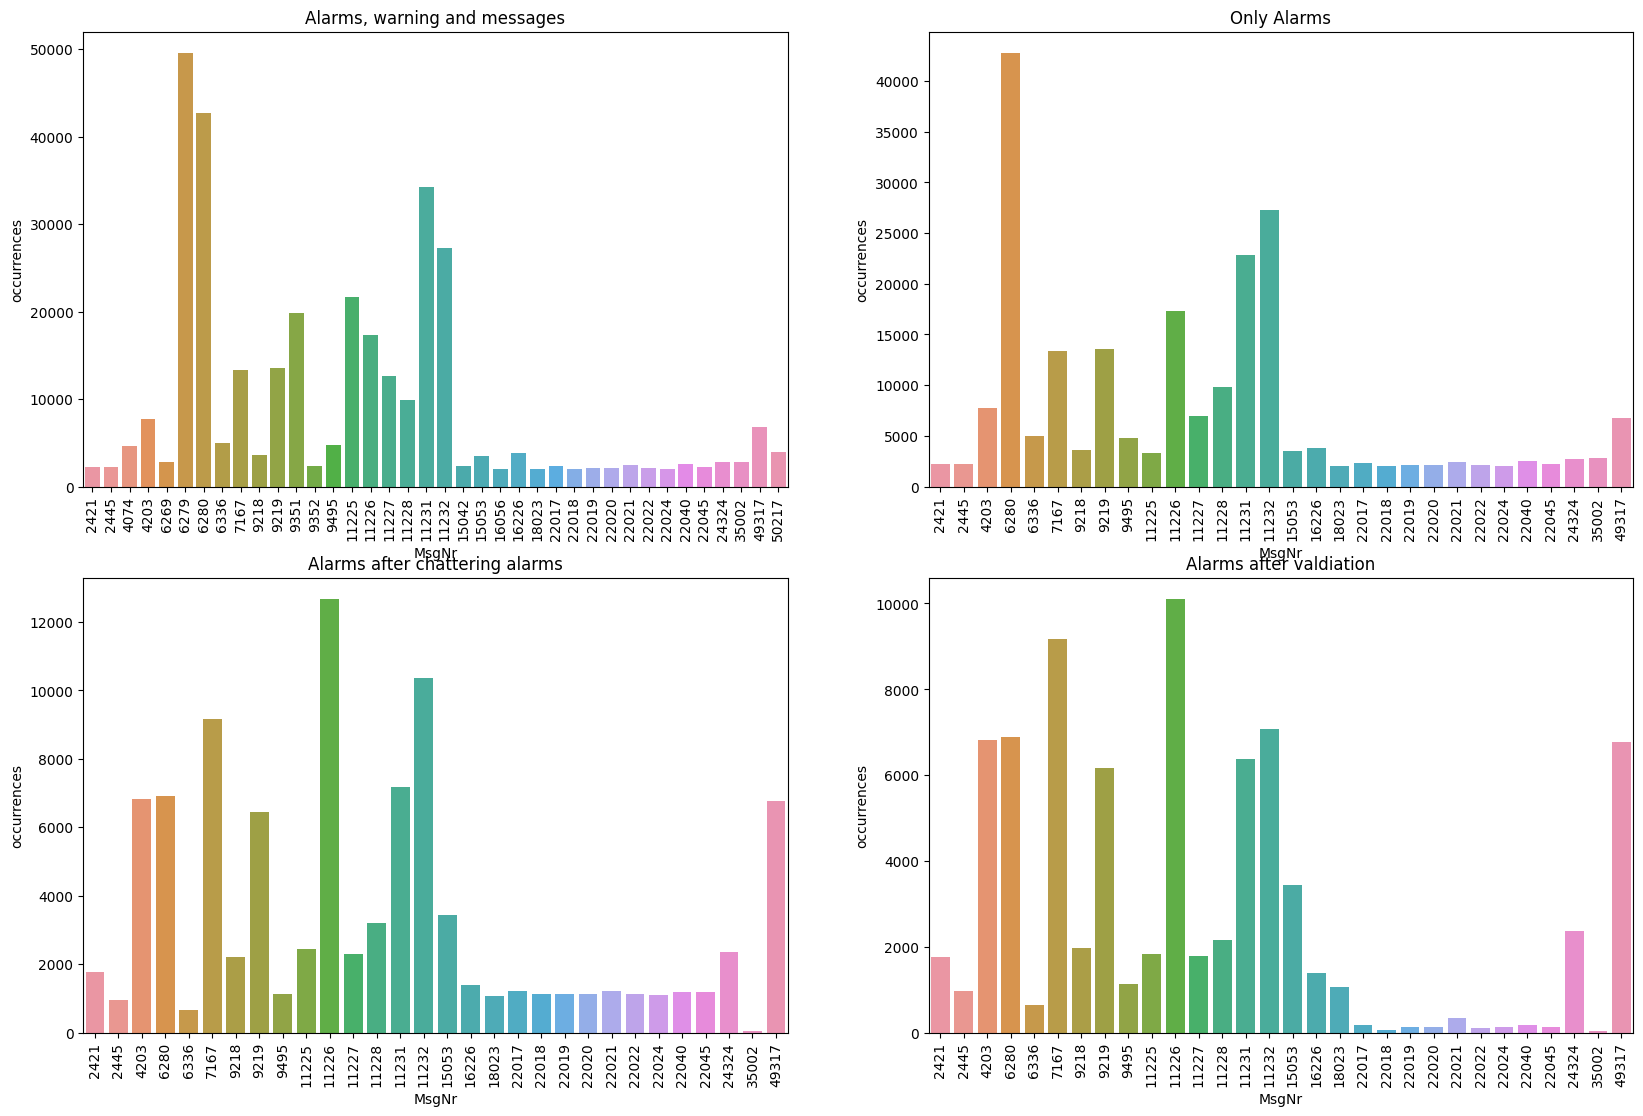

In [99]:
fig, axs = plt.subplots(ncols= 2, nrows =2, figsize=(20,13))

sns.barplot(data=df_complete, x=df_complete.index, y='occurrences', ax=axs[0,0])
axs[0,0].tick_params(axis='x', labelrotation=90)
axs[0,0].set_title("Alarms, warning and messages")

sns.barplot(data=df_alarms, x=df_alarms.index, y='occurrences', ax=axs[0,1])
axs[0,1].tick_params(axis='x', labelrotation=90)
axs[0,1].set_title("Only Alarms")

sns.barplot(data=df_chattering, x=df_chattering.index, y='occurrences', ax=axs[1,0])
axs[1,0].tick_params(axis='x', labelrotation=90)
axs[1,0].set_title("Alarms after chattering alarms")

sns.barplot(data=data_filtered, x=data_filtered.index, y='occurrences', ax=axs[1,1])
axs[1,1].tick_params(axis='x', labelrotation=90)
axs[1,1].set_title("Alarms after valdiation")

plt.show()

In [100]:
events = df.groupby(['MsgNr', 'Plant'])['Text'].agg(list).reset_index(name='description')

In [101]:
events

,MsgNr,Plant,description
0,2421,Chargierung,[Absaugung Chargierung Filter 1 Ventilator 1 A...
1,2445,Chargierung,[Absaugung Chargierung DFT Klappe K3.5 Endscha...
2,4203,Rekuperator,[StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ...
3,6280,Sammelkam.,"[Differenzdruck Filter zu Hoch. Alarm, Differe..."
4,6336,Sammelkam.,"[Wollabheber Klappemotor Positionsfehler, Woll..."
5,7167,Bindemittel,[ImprÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃ...
6,9218,ACON/E-Welle,"[Danee links laser blocked, Danee links laser ..."
7,9219,ACON/E-Welle,"[Daneel rechts laser blocked, Daneel rechts la..."
8,9495,ACON,"[Error Komunikation Line PC, Error Komunikatio..."
9,11225,CO_Curingoven,"[Druck oberband eintritt hoch, Druck oberband ..."


In [102]:
events['description'] = events['description'].apply(lambda x: list(set(x)))

In [103]:
events.to_excel('events.xlsx')

# New sets

In [104]:
#calculate the difference in seconds between events and agrgegate them into groups

data_bck = data.copy()


In [105]:
data.set_index('DateTime', inplace=True)

In [106]:
data['seconds_diff'] = data.index.to_series().diff().dt.total_seconds()
data['dependence'] = data['seconds_diff'].apply(lambda s: 0 if s<=60 else 1)

data.head()

C:\Users\manda\AppData\Local\Temp\ipykernel_17580\714271656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seconds_diff'] = data.index.to_series().diff().dt.total_seconds()
C:\Users\manda\AppData\Local\Temp\ipykernel_17580\714271656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dependence'] = data['seconds_diff'].apply(lambda s: 0 if s<=60 else 1)


,MsgNr,Component,Plant,Text,time_diff,time_diff_plant,seconds_diff,dependence
DateTime,,,,,,,,
2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,NaT,NaT,NaN,1
2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,NaT,NaT,615.0,1
2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,NaT,NaT,520.0,1
2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,0 days 00:02:05,0 days 00:02:05,125.0,1
2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:11:15,0 days 00:11:15,30.0,0


In [107]:
data['inverted'] = data.dependence.shift()
data['output'] = 0
data.loc[data.dependence==0, 'output'] = data[data.dependence==0].inverted.cumsum()
data.head()

C:\Users\manda\AppData\Local\Temp\ipykernel_17580\664869863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['inverted'] = data.dependence.shift()
C:\Users\manda\AppData\Local\Temp\ipykernel_17580\664869863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['output'] = 0


,MsgNr,Component,Plant,Text,time_diff,time_diff_plant,seconds_diff,dependence,inverted,output
DateTime,,,,,,,,,,
2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,NaT,NaT,NaN,1,NaN,0
2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,NaT,NaT,615.0,1,1.0,0
2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,NaT,NaT,520.0,1,1.0,0
2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,0 days 00:02:05,0 days 00:02:05,125.0,1,1.0,0
2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:11:15,0 days 00:11:15,30.0,0,1.0,1


In [108]:
data.reset_index(inplace=True)
data['new_output'] = data['output'].shift(-1)
data['sequences'] = data['output']
data.loc[data['new_output'] >= data['output'], 'sequences'] = data['new_output']
data[:30]

C:\Users\manda\AppData\Local\Temp\ipykernel_17580\217981111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_output'] = data['output'].shift(-1)
C:\Users\manda\AppData\Local\Temp\ipykernel_17580\217981111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sequences'] = data['output']


,DateTime,MsgNr,Component,Plant,Text,time_diff,time_diff_plant,seconds_diff,dependence,inverted,output,new_output,sequences
0,2022-01-03 09:17:48,9219,NaN,ACON/E-Welle,Daneel rechts laser blocked,NaT,NaT,NaN,1,NaN,0,0.0,0
1,2022-01-03 09:28:03,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,NaT,NaT,615.0,1,1.0,0,0.0,0
2,2022-01-03 09:36:43,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,NaT,NaT,520.0,1,1.0,0,0.0,0
3,2022-01-03 09:38:48,16226,2-2.1F8,Schw.SpaltsÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂ...,StÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ‚...,0 days 00:02:05,0 days 00:02:05,125.0,1,1.0,0,1.0,1
4,2022-01-03 09:39:18,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:11:15,0 days 00:11:15,30.0,0,1.0,1,0.0,1
5,2022-01-03 09:53:36,49317,Kupolofen,BiMi-Lager,AusgleichsbehÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃ...,0 days 00:14:18,0 days 00:14:18,858.0,1,0.0,0,0.0,0
6,2022-01-03 10:00:21,18023,UV015,LiniensÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â...,Bandsaege 2 Laufstoerung,NaT,NaT,405.0,1,1.0,0,0.0,0
7,2022-01-03 10:03:25,24324,.10-63.26A3,Abfallbeh. UV42,Schalter FÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒ...,NaT,NaT,184.0,1,1.0,0,0.0,0
8,2022-01-03 10:10:01,9218,NaN,ACON/E-Welle,Danee links laser blocked,NaT,0 days 00:52:13,396.0,1,1.0,0,0.0,0
9,2022-01-03 10:11:28,9218,NaN,ACON/E-Welle,Danee links laser blocked,0 days 00:01:06,0 days 00:01:27,87.0,1,1.0,0,0.0,0


In [109]:
data = data[['DateTime', 'MsgNr', 'Component', 'Plant', 'sequences']]

In [110]:
df_bck.to_csv('./dataframes/clean_data.csv')

In [111]:
data.to_csv('./dataframes/clean_data_reduction.csv')